In [9]:
import json
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from cycler import cycler
import os

def load_json_data(filename):
    """Load data from a JSON file."""
    with open(filename, "r") as f:
        return json.load(f)
    
def configure_scientific_style():
    """Configure matplotlib for scientific publication quality plots."""
    # Create output directory if it doesn't exist
    os.makedirs("figures", exist_ok=True)
    
    # Set up a scientific style with smoke gray background
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Define a color-blind friendly scientific color palette
    # Based on ColorBrewer and scientific publication standards
    scientific_colors = ['#0173B2', '#DE8F05', '#029E73', '#D55E00', 
                        '#CC78BC', '#CA9161', '#FBAFE4', '#949494', 
                        '#ECE133', '#56B4E9']
    
    plt.rcParams['axes.prop_cycle'] = cycler(color=scientific_colors)
    plt.rcParams['figure.facecolor'] = '#F5F5F5'  # Smoke gray background
    plt.rcParams['axes.facecolor'] = '#F5F5F5'    # Smoke gray background
    plt.rcParams['savefig.facecolor'] = '#F5F5F5' # Smoke gray background
    plt.rcParams['grid.color'] = '#CCCCCC'        # Light gray grid
    plt.rcParams['font.family'] = 'serif'         # Standard serif font for academic publishing
    plt.rcParams['font.size'] = 12                # Professional font size
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 18

def plot_results():
    """Plot results from JSON files into separate figure files."""
    # Configure scientific plotting style
    configure_scientific_style()
    
    # Find all matching files and sort them
    files = sorted(glob.glob("results_*.json"))
    num_plots = 4  # Number of different plots
    files_per_plot = math.ceil(len(files) / num_plots)
    
    # Create each plot as a separate figure
    for i in range(num_plots):
        # Create a new figure for each plot
        plt.figure(figsize=(10, 6))
        
        # Get the subset of files for this plot
        subset_files = files[i * files_per_plot:(i + 1) * files_per_plot]
        
        # Plot each file's data
        for j, file in enumerate(subset_files):
            file_number = file.split("_")[1].split(".")[0]  # Extract the number from filename
            data = load_json_data(file)
            
            # Convert keys to integers and sort by x value
            x_values = list(map(int, data.keys()))
            sorted_indices = np.argsort(x_values)
            x_values = [x_values[idx] for idx in sorted_indices]
            y_values = [list(data.values())[idx] for idx in sorted_indices]
            
            # Plot with markers and lines
            plt.plot(x_values, y_values, marker="o", linestyle='-', 
                    linewidth=2, markersize=6, label=f"Ansatz {file_number}")
        
        # Configure the plot
        plt.xlabel("Number of orbitals in symmetric group", fontweight='bold')
        plt.ylabel("Variance of expectation values", fontweight='bold')
        plt.yscale("log")  # Set y-axis to logarithmic scale
        
        # Set fixed y-axis limits for all plots to ensure consistency
        plt.ylim(1e-8, 1e-1)  # Adjust these values based on your actual data range
        
        #plt.title(f"SIM Ansatz Performance (Set {i+1})", fontweight='bold')
        
        # Add a grid with lower opacity for better readability
        plt.grid(True, alpha=0.7, linestyle='--')
        
        # Position legend optimally
        plt.legend(title="Ansatz Identifier", framealpha=0.9, loc='best')
        
        # Add a subtle box around the plot for better framing
        plt.box(True)
        
        # Tight layout for better spacing
        plt.tight_layout()
        
        # Save the figure with high DPI
        filename = f"sim_ansatz_plot_{i+1}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved figure to {filename}")
    
    # Display completion message rather than showing plots directly
    print(f"Generated {num_plots} separate figures in the 'figures' directory")

Saved figure to sim_ansatz_plot_1.png
Saved figure to sim_ansatz_plot_2.png
Saved figure to sim_ansatz_plot_3.png
Saved figure to sim_ansatz_plot_4.png
Generated 4 separate figures in the 'figures' directory


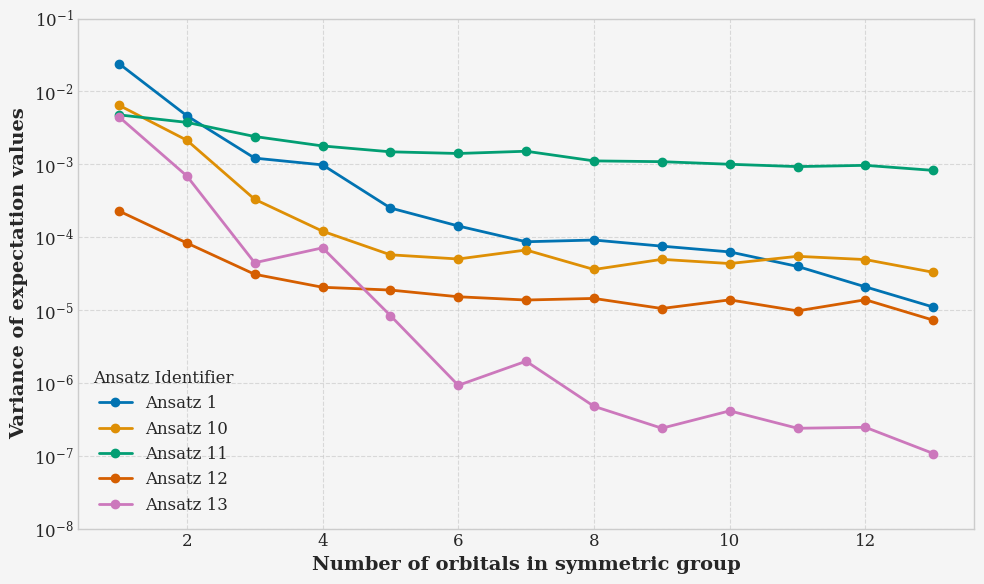

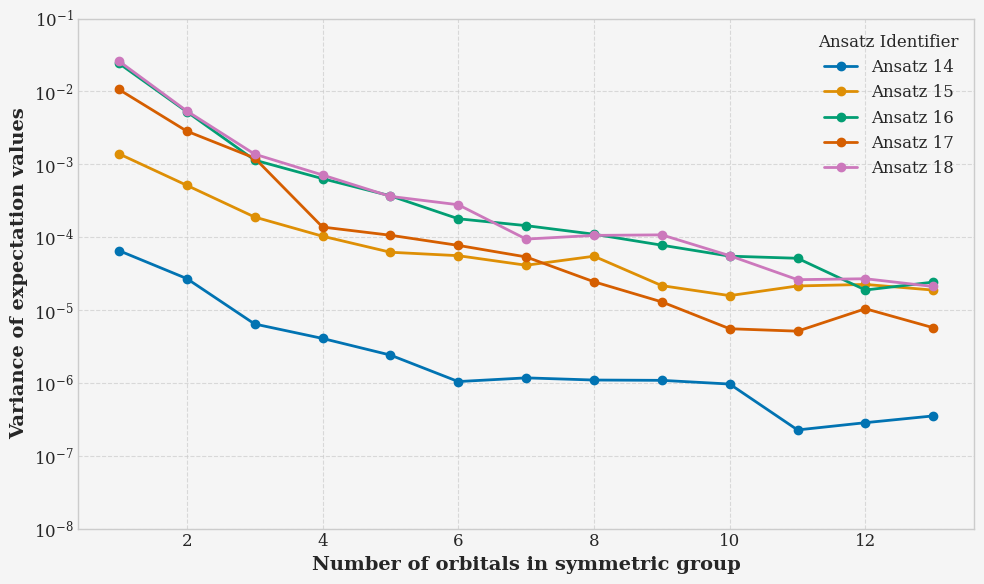

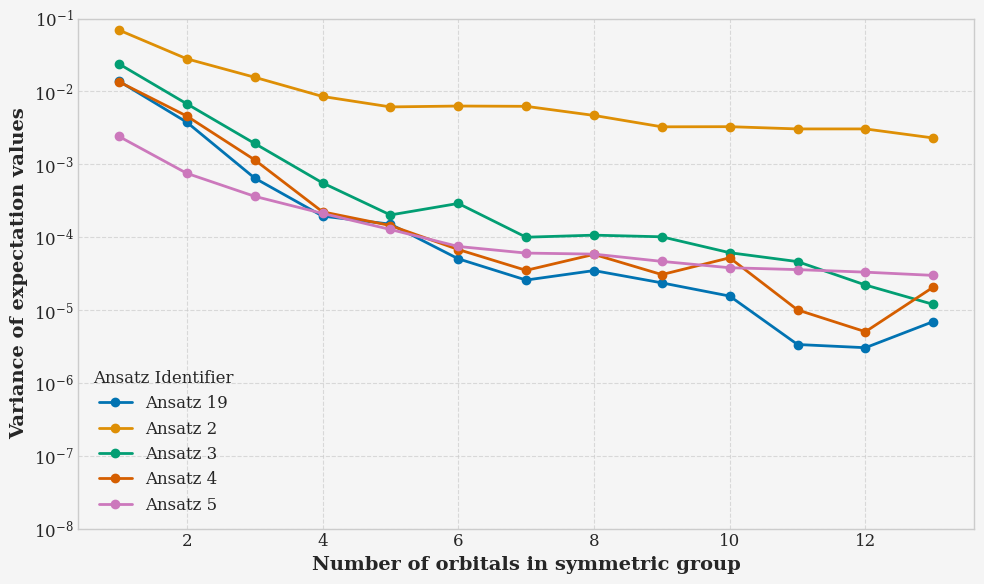

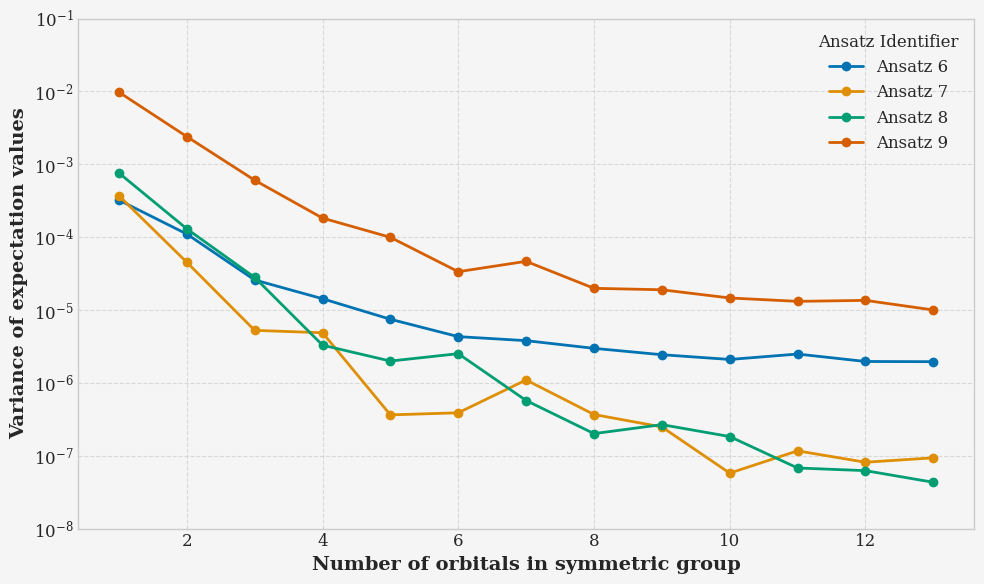

In [10]:
plot_results()